In [106]:
from scipy import *
import numpy as np
import WLanalysis
from matplotlib import pyplot

In [ ]:
## generate average stats, on stampede2
# ALL_fn = genfromtxt('ALL_fn.txt',dtype='string')
# fn_list = genfromtxt('cosmo_params_all.txt',usecols=1, dtype='string')
# fnjia_list = genfromtxt('cosmo_params_all.txt',usecols=0, dtype='string')
# stats_fn = lambda iALL, ieb, icosmo: '/scratch/02977/jialiu/peakaboo/stats/'+icosmo+'/1024b512/'+ieb+'/'+iALL
# stats_dir = '/scratch/02977/jialiu/peakaboo/stats_avg/'
# for ieb in ['output_eb_5000_s4','output_tt_3000_s4']:        
#     for iALL in ALL_fn:
#         out_fn = stats_dir+'%s_%s'%(ieb, iALL)
#         print out_fn
#         out = array([mean(load(stats_fn(iALL, ieb, icosmo)),axis=0) for icosmo in fn_list])
#         save(out_fn, out)

In [73]:
z_source = arange(0.5,3,0.5)
pdf2debI = array([load('stats_avg/output_eb_5000_s4_ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dttI = array([load('stats_avg/output_tt_3000_s4_ALL_igalXicmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2debN = array([load('stats_avg/output_eb_5000_s4_ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])
pdf2dttN = array([load('stats_avg/output_tt_3000_s4_ALL_galXcmb_2dpdf_%.1f_1.0_1.0.npy'
                     %(iz)) for iz in z_source])

In [50]:
X, Y = meshgrid(linspace(-3,5,80), linspace(-3,3,60))
print X.shape, Y.shape, pdf2debI.shape
#print ilev0

(60, 80) (60, 80) (5, 101, 60, 80)
[0.001249283606203053, 0.00015480930447889422, 9.251917013235691e-06]


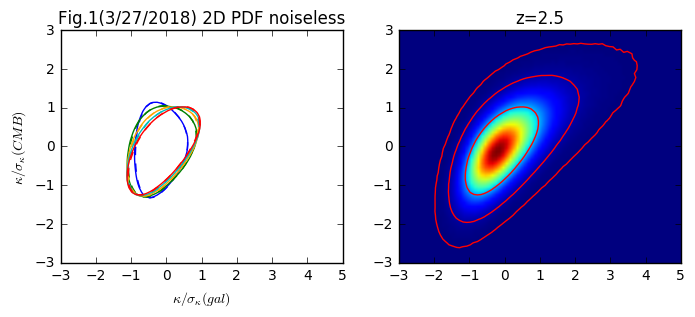

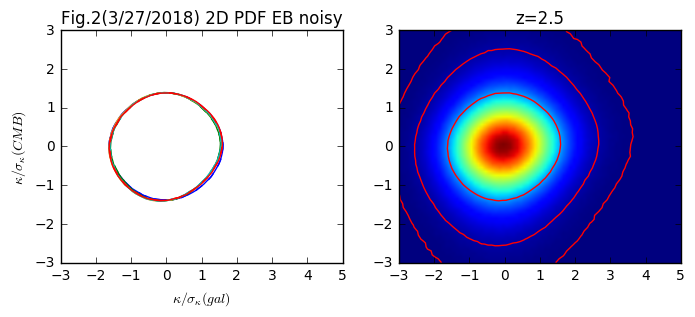

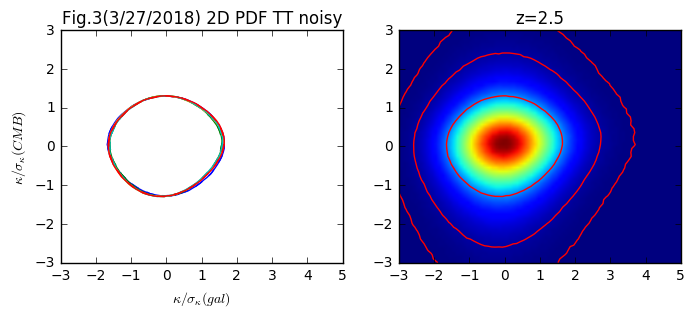

In [92]:
i = 0
titles = ['noiseless',  'EB noisy', 'TT noisy']
for pdf2ds in [pdf2debI, pdf2debN, pdf2dttN]:
    i+=1
    f, (ax1,ax2) = subplots(1,2,figsize=(8,3))
    seed(45)
    colors=['b','g','orange','c','r']
    for iz in range(5):
        icolor=rand(3)
        ipdf0 = pdf2ds[iz, 0]
        ilev0=WLanalysis.findlevel(ipdf0)
        ipdf1 = pdf2ds[iz, 1]
        ilev1=WLanalysis.findlevel(ipdf1)
        ax1.contour(X, Y, ipdf0, levels=[ilev0[0],], colors=colors[iz],label='z=%.1f'%(z_source[iz]))
        ax1.contour(X, Y, ipdf1, levels=[ilev1[0],], colors=colors[iz], linestyles='dashed')
        if iz==4:
            ax2.imshow(ipdf0,extent=[-3,5,-3,3], origin='lower',aspect='auto')
            ax2.contour(X, Y,ipdf0, levels=sort(ilev0), colors='r',label='z=%.1f'%(z_source[iz]))
    ax1.legend(loc=0,frameon=0, fontsize=10)
    #ax1.set_xlim(-2,2)
    #ax1.set_ylim(-2,2)
    ax1.set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')
    ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
    ax1.set_title('Fig.%i(3/27/2018) 2D PDF %s'%(i, titles[i-1]))
    ax2.set_title('z=2.5')
    show()
    


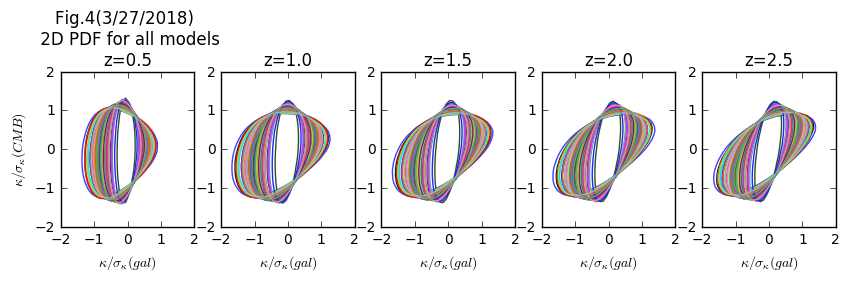

In [110]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):
    seed(45)
    for ipdf2ds in pdf2debI[iz]:
        icolor=[rand(3),]
        ilev=WLanalysis.findlevel(ipdf2ds)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=icolor)
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.4(3/27/2018) \n 2D PDF for all models\nz=0.5')
show()

In [87]:
pdf2debI.shape

(5, 101, 60, 80)

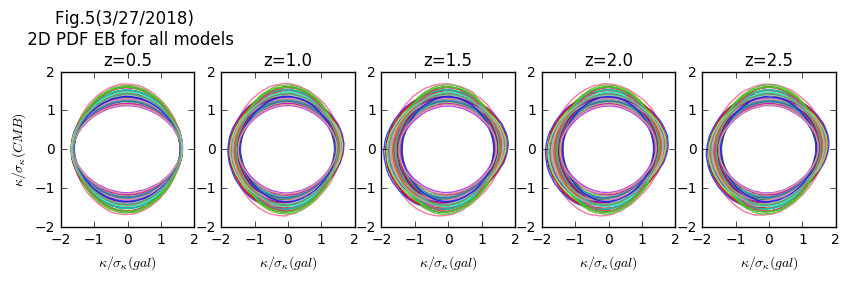

In [111]:
f, axes = subplots(1,5,figsize=(10,2))
for iz in range(5):
    seed(45)
    for ipdf2ds in pdf2debN[iz]:
        icolor=[rand(3),]
        ilev=WLanalysis.findlevel(ipdf2ds)
        axes[iz].contour(X, Y, ipdf2ds, levels=[ilev[0],],colors=icolor)
    axes[iz].set_title('z=%.1f'%(z_source[iz]))
    axes[iz].set_xlim(-2,2)
    axes[iz].set_ylim(-2,2)
    axes[iz].locator_params(tight=True, nbins=4)
    axes[iz].set_xlabel(r'$\kappa/\sigma_\kappa (gal)$')

ax1=axes[0]
ax1.legend(loc=0,frameon=0, fontsize=10)
ax1.set_ylabel(r'$\kappa/\sigma_\kappa (CMB)$')
ax1.set_title('Fig.5(3/27/2018) \n 2D PDF EB for all models\nz=0.5')
show()